# 📘 Notebook de Análise de Imagens 

Este notebook apresenta um pipeline completo de análise de imagens sem classificação, focado em extrair e visualizar características visuais utilizando OpenCV e matplotlib.

---

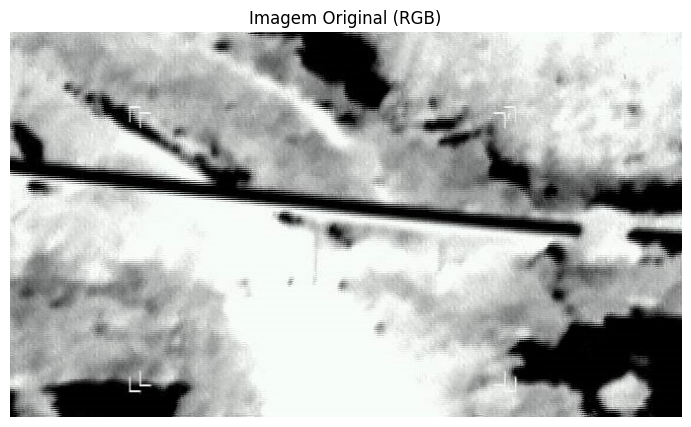

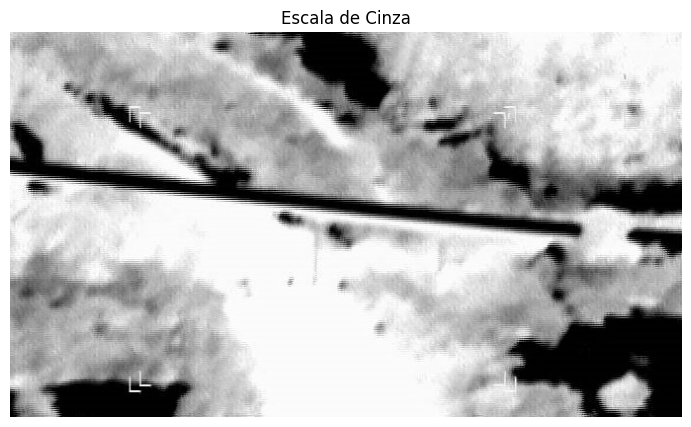

In [1]:
# Parte 1 Carregamento, conversão de cores e histograma
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Função para carregar e exibir a imagem em RGB
def load_image(filepath):
    image_bgr = cv2.imread(filepath)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    return image_bgr, image_rgb

# Exibir imagem com matplotlib
def show_image(title, image, gray):
    if gray:
        plt.figure(figsize=(10, 5))
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        plt.figure(figsize=(10, 5))
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
        plt.show()

# Função para converter em outros espaços de cor
def convert_colors(image_bgr):
    gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
    return gray, hsv

# Exemplo de uso
image_path = './D/bordaRealceD2.jpg'  # coloque o caminho da sua imagem aqui
image_bgr, image_rgb = load_image(image_path)
show_image("Imagem Original (RGB)", image_rgb, False)

gray, hsv = convert_colors(image_bgr)
show_image("Escala de Cinza", gray, True)



In [2]:
print(type(gray))  # Deve ser <class 'numpy.ndarray'>
print(gray[:5])  # Primeiras 5 linhas da matriz
print("Tipos de dados:", gray.dtype)  # Deve ser uint8
print("Altura x Largura:" ,gray.shape)  # Deve ser (altura, largura)

total_pixels = gray.shape[0] * gray.shape[1]
print(f'Total de pixels: {total_pixels}')


<class 'numpy.ndarray'>
[[222 224 222 ... 243 237 234]
 [216 218 218 ... 241 238 241]
 [203 208 216 ... 237 237 245]
 [206 208 215 ... 234 232 241]
 [215 210 208 ... 235 230 236]]
Tipos de dados: uint8
Altura x Largura: (390, 680)
Total de pixels: 265200


## 🎚️ Threshold (Limiarização)
O **threshold** converte uma imagem em tons de cinza para uma imagem **binária**.

- Define-se um valor limite, e:
  - Pixels acima do limite viram **branco (255)**.
  - Pixels abaixo viram **preto (0)**.
- Usado para separar objetos do fundo.
- Em OpenCV: `cv2.threshold(image, thresh_value, max_value, type)`.

Tipos comuns:
- `cv2.THRESH_BINARY`
- `cv2.THRESH_OTSU` (threshold automático)

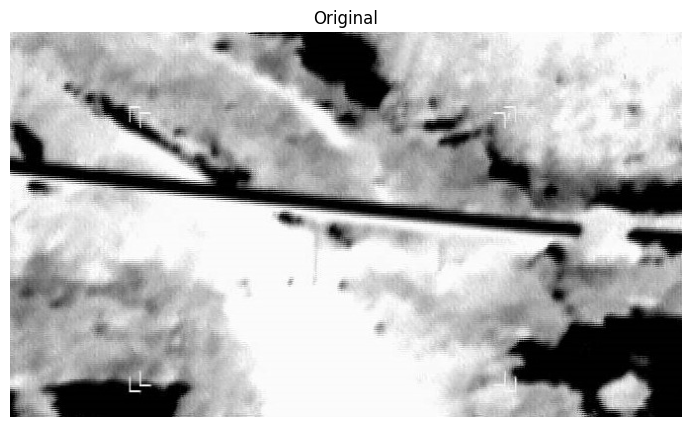

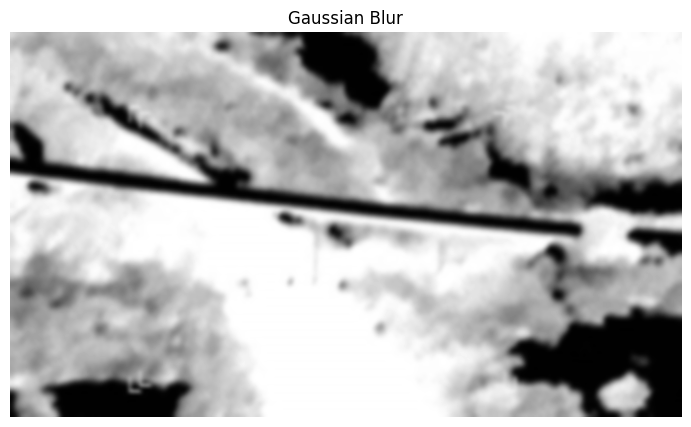

In [7]:
# Desfoque e realce

def apply_blurs(image):
    blur = cv2.GaussianBlur(image, (9, 9), 2)
    return blur



# Aplicação
blur = apply_blurs(gray)

show_image("Original", gray, True)
show_image("Gaussian Blur", blur, True)


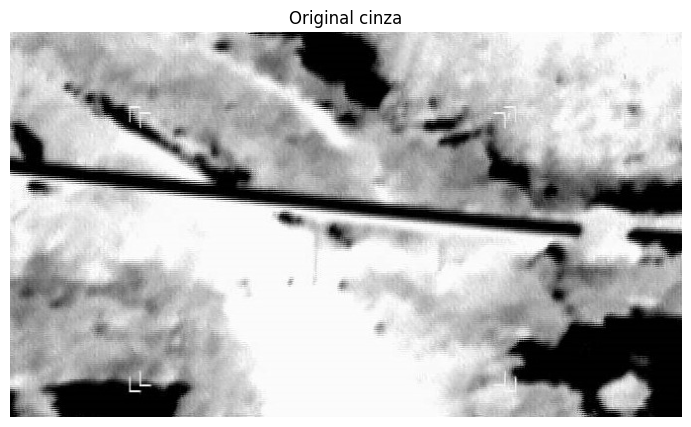

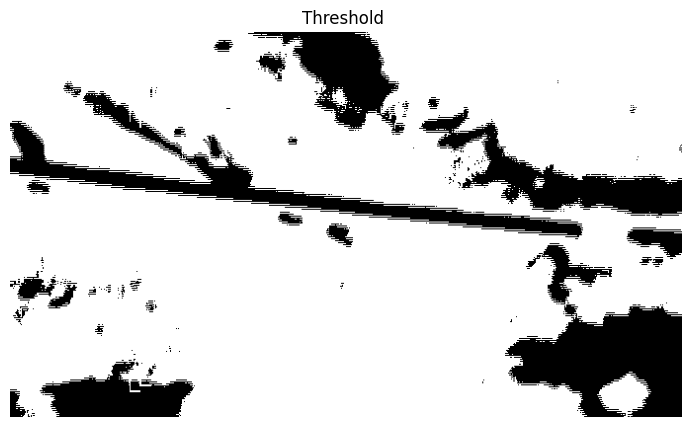

In [13]:
# Threshold e Binarização
def thresholding(image_gray, min, max):
    ret1, th = cv2.threshold(image_gray, min, max, cv2.THRESH_BINARY)
    return th

th = thresholding(gray, 120,255)
show_image("Original cinza", gray, True)

show_image("Threshold ", th, True)





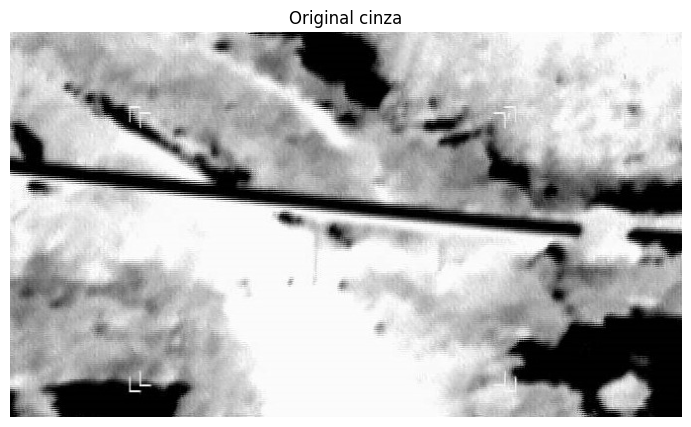

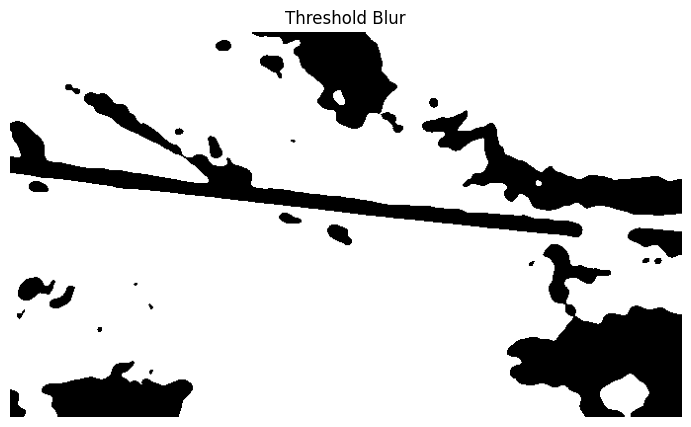

In [14]:
# Threshold e Binarização
def thresholding(image_gray, min, max):
    ret1, th = cv2.threshold(image_gray, min, max, cv2.THRESH_BINARY)
    return th

th = thresholding(blur, 120,255)
show_image("Original cinza", gray, True)

show_image("Threshold Blur", th, True)





## 🔺 High Pass Filter (Filtro Passa-Alta)
O **High Pass Filter** destaca bordas e mudanças bruscas de intensidade.

- Remove áreas suaves e realça detalhes.
- É a base para muitos detectores de bordas.
- Exemplo: Filtro Laplaciano e kernels personalizados.

---

## ✴️ Laplacian (Filtro Laplaciano)
O **Filtro Laplaciano** detecta bordas usando a **segunda derivada** da intensidade dos pixels.

- Identifica áreas com variações rápidas (bordas em qualquer direção).
- Sensível a ruídos, por isso é comum aplicar um blur antes.
- Em OpenCV: `cv2.Laplacian(image, cv2.CV_64F)`.

---

## ⚡ Canny (Detector de Bordas Canny)
O algoritmo **Canny** é um dos melhores detectores de bordas.

Etapas:
1. Aplicação de **Gaussian Blur**.
2. Cálculo do gradiente (bordas).
3. Supressão de não-máximos.
4. Aplicação de thresholds (duplo limiar).
5. Rastreamento de bordas.

- Em OpenCV: `cv2.Canny(image, threshold1, threshold2)`.

🔹 Thresholds definem a sensibilidade da detecção.

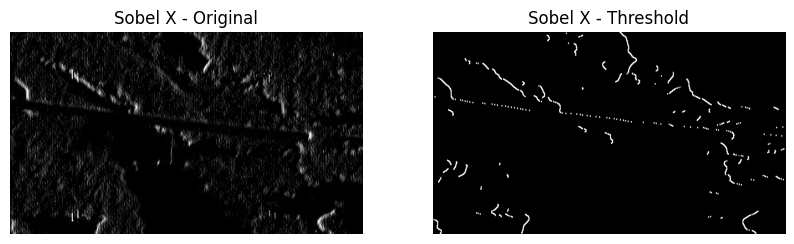

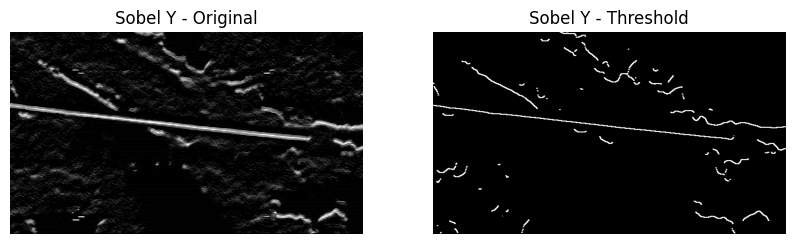

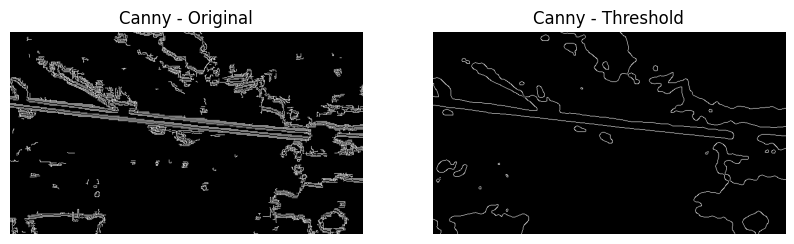

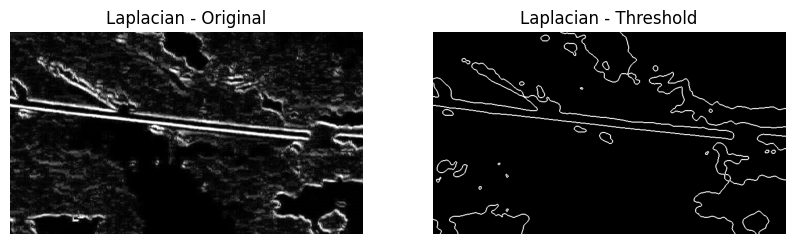

In [15]:

# Definindo os kernels Sobel
sobel_y = np.array([[ -1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])

sobel_x = np.array([[ -1, 0, 1], 
                    [ -2, 0, 2], 
                    [ -1, 0, 1]])

# Função genérica para exibir comparações
def compare_filters(title, img_gray_result, img_th_result):
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_gray_result, cmap='gray')
    plt.title(f'{title} - Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_th_result, cmap='gray')
    plt.title(f'{title} - Threshold')
    plt.axis('off')

    plt.show()

# Funções de filtros
def apply_sobel(image_gray):
    sobelx = cv2.filter2D(image_gray, -1, sobel_x)
    sobely = cv2.filter2D(image_gray, -1, sobel_y)
    sobel_combined = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
    return sobelx, sobely

def apply_canny(image_gray, threshold1=100, threshold2=200):
    return cv2.Canny(image_gray, threshold1, threshold2)

def apply_laplacian(image_gray):
    laplacian = cv2.Laplacian(image_gray, cv2.CV_64F)
    laplacian_abs = cv2.convertScaleAbs(laplacian)
    return laplacian_abs

# ---- MAIN FLOW ----

# Supondo que você já tenha a variável 'gray' carregada
# Exemplo: gray = cv2.imread('imagem.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicando Gaussian Blur
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Aplicando e comparando Sobel
sobel_grayX,sobel_grayY = apply_sobel(gray)
sobel_thX, sobel_thY = apply_sobel(th)
compare_filters("Sobel X", sobel_grayX, sobel_thX)
compare_filters("Sobel Y", sobel_grayY, sobel_thY)


# Aplicando e comparando Canny
canny_gray = apply_canny(gray, 100, 200)
canny_th = apply_canny(th, 100, 200)
compare_filters("Canny", canny_gray, canny_th)

# Aplicando e comparando Laplacian
laplacian_gray = apply_laplacian(gray)
laplacian_th = apply_laplacian(th)
compare_filters("Laplacian", laplacian_gray, laplacian_th)




## 📐 Contornos e Formas
A detecção de **contornos** identifica os limites externos de objetos em uma imagem binária.

- Em OpenCV: `cv2.findContours()`.
- Permite medir:
  - Área
  - Perímetro
  - Detectar formas geométricas (círculo, quadrado).
- Pode-se usar `cv2.approxPolyDP` para simplificar formas.


🔹 Total de contornos detectados (após filtro): 18
➡️ Exibindo os 4 maiores contornos:



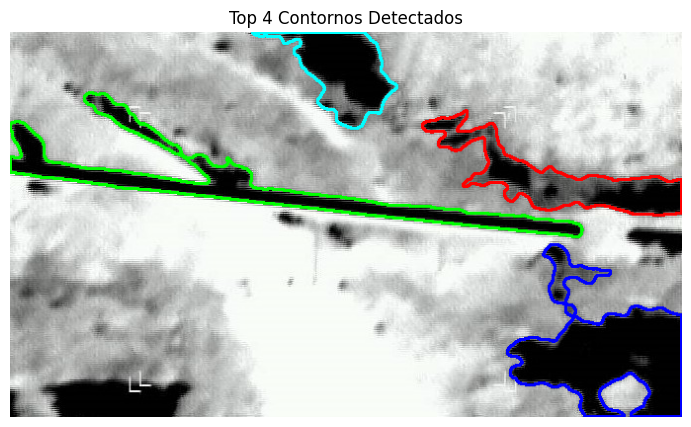

In [25]:
# Parte 6 – Detecção de Formas


def display_results(image_rgb, contours, max_display=10, min_area=100):
    """
    Filtra, desenha e exibe apenas os Top N contornos na imagem.
    
    Parameters:
        image_rgb (numpy.ndarray): Imagem original colorida.
        contours (list): Lista de contornos detectados.
        max_display (int): Número máximo de contornos a exibir.
        min_area (int): Área mínima para considerar o contorno.
    """
    # Filtrar contornos com área mínima
    filtered_contours = [c for c in contours if cv2.contourArea(c) > min_area]
    
    # Ordenar por área decrescente
    filtered_contours = sorted(filtered_contours, key=cv2.contourArea, reverse=True)
    
    # Selecionar os Top N contornos
    display_contours = filtered_contours[:max_display]
    
    print(f"\n🔹 Total de contornos detectados (após filtro): {len(filtered_contours)}")
    print(f"➡️ Exibindo os {len(display_contours)} maiores contornos:\n")
    
    # Imagem para desenhar (cópia da original)
    image_with_contours = image_rgb.copy()
    
    # Desenhar apenas os contornos selecionados
    cv2.drawContours(image_with_contours, display_contours, -1, (0, 255, 0), 2)
    
    # Imprimir parâmetros
    # Lista de 10 cores
    colors = [
        (255,   0,   0), (  0, 255,   0), (  0,   0, 255),
        (255, 255,   0), (255,   0, 255), (  0, 255, 255),
        (128,   0,   0), (128, 128,   0), (  0, 128, 128),
        (128,   0, 128)
    ]
    for idx, contour in enumerate(display_contours):
        color = colors[idx % len(colors)]
        cv2.drawContours(image_with_contours, [contour], -1, color, 2)

    
    # Exibir imagem convertida para RGB
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
    plt.title(f'Top {len(display_contours)} Contornos Detectados')
    plt.axis('off')
    plt.show()


binary_inverted = cv2.bitwise_not(th)
contours, _ = cv2.findContours(binary_inverted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Exibir apenas os Top N contornos com área mínima
display_results(image_rgb, contours, max_display=4, min_area=50)


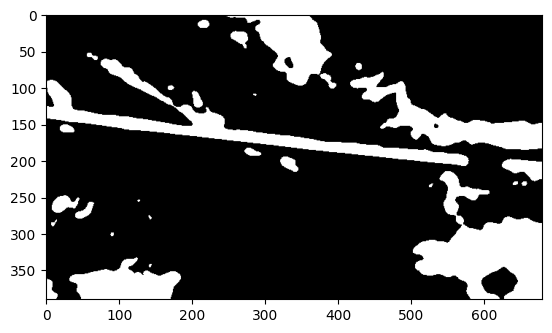

In [26]:
plt.imshow(binary_inverted, cmap = "gray")

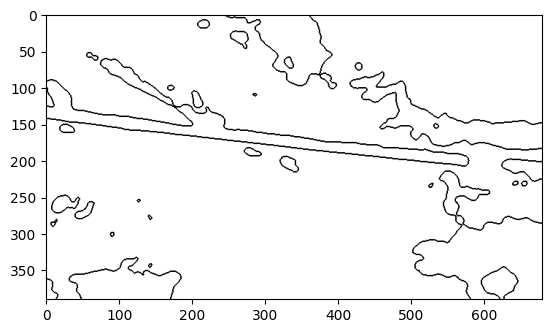

In [27]:
binary_invertedLP = cv2.bitwise_not(laplacian_th)
plt.imshow(binary_invertedLP, cmap = "gray")